# 01: Gradient descent
<h3>

- $X\sim U(0,1)$
- $y = 2 + 9X + \epsilon$
- $\epsilon \sim N(0,1)$

</h3>

(1000, 1) (1000, 1)


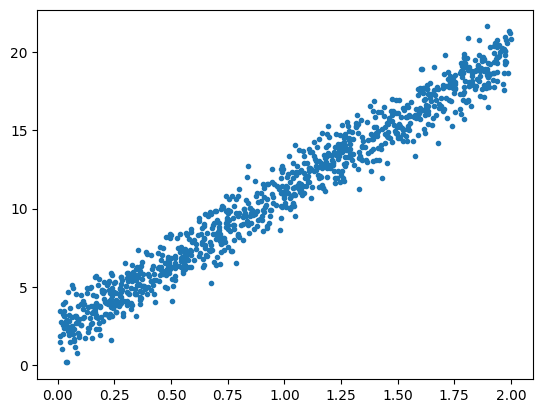

In [1]:
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

samples = 1000
np.random.seed(42) # seed funkar bara per cell i jupyter notebook

# mellan 0 och <1
X = 2*np.random.rand(samples,1) # uniform distribution

epsilon = np.random.normal(0,1, size=(samples,1)) # normal / bell shape

print(epsilon.shape, X.shape)

y = 2 + 9*X + epsilon

plt.plot(X,y, '.')

In [2]:
#X # (1000,1) men vi vill ha den med ettor: i X-matrisen vill vi ha ettor i första kolumnen

X = np.c_[np.ones(samples), X]

X[:5], X.shape

(array([[1.        , 0.74908024],
        [1.        , 1.90142861],
        [1.        , 1.46398788],
        [1.        , 1.19731697],
        [1.        , 0.31203728]]),
 (1000, 2))

## Train|test split

In [6]:
from sklearn.model_selection import train_test_split

# superviktigt: x_train, x_test, y_train, y_test
# beroende på ordning kan det bli helt fel

# help(train_test_split) <- hämta ordning härifrån

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 2), (330, 2), (670, 1), (330, 1))

## Batch gradient descent

In [16]:
np.random.seed(42)

def gradient_descent(X, y, learning_rate=.1, epochs = 100): # epoch = ett steg
    m = len(X)
    theta = np.random.randn(X.shape[1],1) # = theta = [beta0, beta1]^T för transponat

    for _ in range(epochs):
        gradient = 2/m*X.T@(X@theta-y) # matmul, matrismultiplikation operator overloadad genom numpy
        theta -= learning_rate * gradient # learning_rate is eta in theory
        # gamla theta minus learning rate * gradient
    return theta

theta = gradient_descent(X_train, y_train, epochs=500)
theta.reshape(-1) # throws aditional dimenstion

array([[2.20500755],
       [8.90206087]])

In [21]:
steps = range(1,200,1) # range objekt med ett steg mellan

thetas = np.array(
    [gradient_descent(X_train, y_train, epochs=epoch).reshape(-1) for epoch in steps]
    )
thetas.shape

(199, 2)

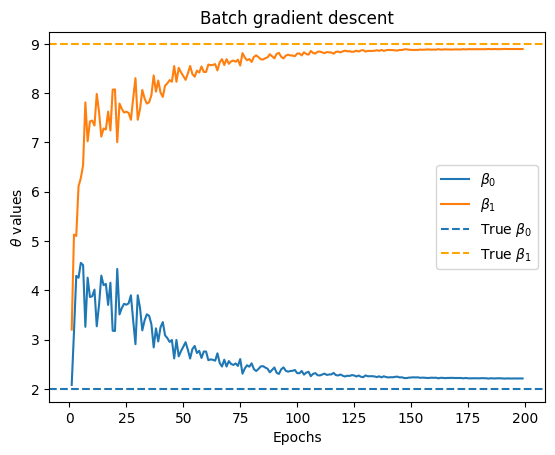

In [25]:
fig, ax = plt.figure(), plt.axes()
ax.plot(steps, thetas, label = [r"$\beta_0$", r"$\beta_1$"])
ax.axhline(y = 2, linestyle="--", label = r"True $\beta_0$")
ax.axhline(y = 9, color = "orange", linestyle="--", label = r"True $\beta_1$")
ax.set(xlabel = "Epochs", ylabel = r"$\theta$ values", title ="Batch gradient descent")
ax.legend()
# converges with more epochs

Om skillnaden mellan föregående epok inte är så stor, dvs vi har nått konvergens, kan vi stoppa.

---

## Stochastic gradient descent (SGD)
- Geron (2019)

learning rate
tweaka med olika strategier

learning schedule hyperparameters
decays over time

In [28]:
epochs = 10
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_rate_schedule(t):
    """Decreases the learning rate as training progresses"""
    return t0/(t+t1)

theta = np.random.randn(2,1)
m = len(X_train)

# för varje datapunkt (sample) i träningssetet, men med återläggnig = finns chans för återplockning
for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m) # hämtar index => kan ge samma tal igen
        x_i = X_train[random_index:random_index+1]
        y_i = y_train[random_index:random_index+1]

        gradients = 2*x_i.T.dot(x_i.dot(theta) - y_i)
        # motsvarande gradiens från förut, men EN sample åt gången

        eta = learning_rate_schedule(epoch*m+i) # totalt antalet samples plus i 

        theta -= eta*gradients

theta


array([[2.20806213],
       [8.89524524]])

In [32]:
y_pred = X_test@theta
y_pred.shape

MAE = np.mean(np.abs(y_test-y_pred))

MSE = np.mean((y_test-y_pred)**2)

RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(0.7692764862078018, 0.9496227111936495, 0.9744858701867614)